In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Creating the data set
np.random.seed(70)
data_x = np.linspace(-10,10,200).reshape(100,2)
data_y = 15 * data_x[:,0][:,np.newaxis] + 3 * data_x[:,1][:,np.newaxis] + 20 * np.random.rand(100,1) # adding the bias
data_x /= data_x.max() # Scaling the data between -1 to 1

In [4]:
# The hypothesis
# h(w) = w0 + w1.x1 + w2.x2

data_x = np.hstack((np.ones(100).reshape(100,1),data_x)) # Creating 1 as x0 for matrix multiplication

In [5]:
# Cost Function
def get_gradient(w, x, y):
    y_estimate = (x.dot(w)).flatten()
    error = (y.flatten() - y_estimate)
    mse = (1.0/len(x)) * np.sum(np.power(error, 2)) # mse
    gradient = -(1.0/len(x)) * error.dot(x) # gradient step
    return gradient, mse

In [6]:
# Train Test Split
order = np.random.permutation(len(data_x))
portion = 20
test_x = data_x[order[:portion]]
test_y = data_y[order[:portion]]
train_x = data_x[order[portion:]]
train_y = data_y[order[portion:]]
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(80, 3) (80, 1) (20, 3) (20, 1)


In [30]:
# Training the model
w = np.random.randn(3) # Weights
alpha = 0.25 # Learning Rate
tolerance = 1e-3 
print('Initial values of weights:')
print(w[0], w[1], w[2])

# Performing the gradient descent
iteration = 1

while True:
    gradient, error = get_gradient(w, train_x, train_y)
    new_w = w - alpha * gradient # Gradient Descent Step
    
    # Stopping Condition
    if np.sum(abs(new_w - w)) < tolerance:
        print('The model is converged')
        break
    
    # Printing error every 10th iteration
    if iteration % 10 == 0:
        print(f'Iteration: {iteration} Error: {error}')
        #print(f'Iteration: {iteration} gradient: {gradient}')
        print('Updated weights: {:f}, {:f}, {:f}'.format(w[2], w[1], w[0]))
        
    iteration += 1
    w = new_w
    
print('Final Weights: {:f} {:f} {:f}'.format(w[2], w[1], w[0]))
print('Test Cost = ', get_gradient(w, test_x, test_y)[1])

Initial values of weights:
-0.7507658832238449 1.0298008290723244 0.26384133339702104
Iteration: 10 Error: 445.22950185395314
Updated weights: 71.526685, 72.222137, 6.264688
Iteration: 20 Error: 49.54110781468749
Updated weights: 86.084083, 86.752834, 8.921434
Iteration: 30 Error: 38.7185056645332
Updated weights: 88.484701, 89.148270, 9.437019
Iteration: 40 Error: 38.422170691518865
Updated weights: 88.881505, 89.544175, 9.526488
Iteration: 50 Error: 38.41405574486968
Updated weights: 88.947144, 89.609664, 9.541520
The model is converged
Final Weights: 88.957581 89.620076 9.543922
Test Cost =  36.55650633550151


In [ ]:
test_x

In [8]:
print('Final Equation/ Hypothesis look like:')
print('y = {:f}.x2 + {:f}.x1 + {:f}'.format(w[2], w[1], w[0]))

Final Equation/ Hypothesis look like:
y = 88.774349.x2 + 89.803299.x1 + 9.545762


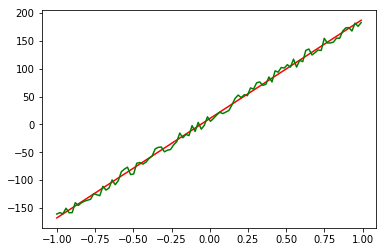

In [24]:
# Plotting the results
plt.plot(data_x[:,1], data_x.dot(w), c='r')
plt.plot(data_x[:,1], data_y, c='g')

In [25]:
test_x.dot(w)

array([-135.83417704,   29.28284421,  -28.14916318,   -6.61216041,
        115.4308553 , -139.4236775 ,  122.60985622,   86.7148516 ,
         47.23034652,  172.86286269,  104.66235391, -153.78167935,
        140.55735853,  101.07285345,  151.32585992,  -35.3281641 ,
        111.84135483,  136.96785807,   14.92484236,  -81.99167011])

In [26]:
test_y

array([[-138.08440445],
       [  22.15494892],
       [ -31.27196766],
       [ -12.61272378],
       [ 115.18093375],
       [-140.8833529 ],
       [ 133.16492363],
       [  96.25481048],
       [  48.08074413],
       [ 174.02671035],
       [ 102.94108189],
       [-158.88947923],
       [ 132.85656082],
       [ 107.29308478],
       [ 146.33231728],
       [ -45.17996514],
       [ 102.98273279],
       [ 133.73922359],
       [  10.82116936],
       [ -90.23977621]])

In [32]:
from sklearn import metrics

In [33]:
metrics.r2_score(test_y,test_x.dot(w))

0.9965756007587019

In [34]:
metrics.mean_squared_error(test_y,test_x.dot(w))

36.55650633550151